# Solve the wave equation

In [1]:
# Define two grid functions `t`, `x` holding the coordinates
function coords(nn, ni, dt, dx)
    t = [n * dt for i in 0:ni, n in 0:nn]
    x = [i * dx for i in 0:ni, n in 0:nn]
    return t, x
end

coords (generic function with 1 method)

In [2]:
nn = 101
ni = 101
dt = 1 / (nn-1)
dx = 1 / (ni-1)
t, x = coords(nn, ni, dt, dx);

In [24]:
# Define initial conditions for a standing wave
function standing(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = cos(2π * t[i, n]) * sin(2π * x[i, n])
    end
    return u
end

standing (generic function with 1 method)

In [25]:
u = standing(t, x);

In [26]:
using CairoMakie

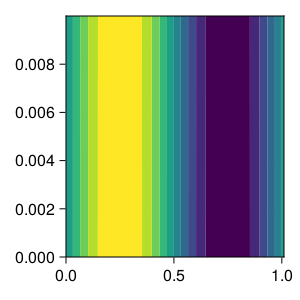

In [33]:
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x[:,1:2]), vec(t[:,1:2]), vec(u[:,1:2]))
fig

In [28]:
# Find the solution at one interior point `u[i,n]`
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / dx^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * dt^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [29]:
# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [30]:
# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

In [31]:
evolve!(u, dt, dx)

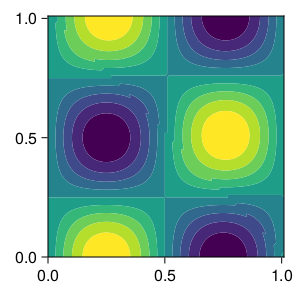

In [32]:
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
fig

In [34]:
t1, x1 = coords(2nn-1, 2ni-1, dt/2, dx/2);

In [35]:
u1 = standing(t1, x1);

In [37]:
evolve!(u1, dt/2, dx/2)

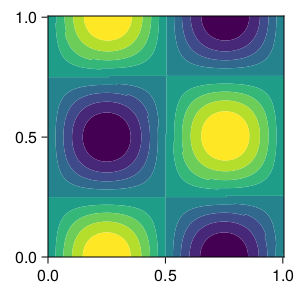

In [43]:
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1,1])
contourf!(fig[1,1], vec(x1), vec(t1), vec(u1))
fig

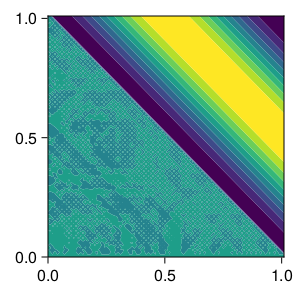

In [48]:
# Show error
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u - cos.(2π * t) .* sin.(2π * x)))
fig

In [49]:
u - cos.(2π * t) .* sin.(2π * x)

102×102 Matrix{Float64}:
 0.0  0.0   0.0           0.0          …   0.0           0.0
 0.0  0.0   6.93889e-18  -2.08167e-17     -2.35922e-16  -5.41234e-16
 0.0  0.0  -4.16334e-17   0.0             -1.11022e-16  -0.0622954
 0.0  0.0   5.55112e-17  -5.55112e-17     -0.0622954    -0.0616783
 0.0  0.0  -8.32667e-17   2.77556e-17     -0.0616783    -0.0608178
 0.0  0.0   0.0           5.55112e-17  …  -0.0608178    -0.0597173
 0.0  0.0   5.55112e-17   0.0             -0.0597173    -0.0583811
 0.0  0.0  -1.66533e-16   0.0             -0.0583811    -0.0568146
 0.0  0.0   0.0          -1.11022e-16     -0.0568146    -0.0550238
 0.0  0.0   0.0           0.0             -0.0550238    -0.0530158
 0.0  0.0   0.0           0.0          …  -0.0530158    -0.0507986
 0.0  0.0   0.0           1.11022e-16     -0.0507986    -0.0483809
 0.0  0.0   0.0           0.0             -0.0483809    -0.0457723
 ⋮                                     ⋱   ⋮            
 0.0  0.0   7.77156e-16  -6.66134e-16  …  -0.048380